## IA Ataques Adversarios en red neuronal

In [10]:
#importamos librerias
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

In [12]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()



In [13]:
# cargamos el modelo dentro de una variable
iv3 = InceptionV3()


In [14]:
#Resumen de la composicion de la red neuronal InceptionV3, cada fila es una capa
print(iv3.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [25]:
# Importamos otro modulo de keras para cargar imagenes
# representamos nuestra imagen como una matriz o por un tensor(matriz multidimensional)
from keras_preprocessing import image

x = image.img_to_array(image.load_img("/content/drive/MyDrive/cerveza.jpg", target_size = (299, 299)))

#reescalamos rangos de intensidad de la matriz x ya que el modelo asigna los colores de -1 a 1 y tenemos de 0 a 255
x /= 255
x -= 0.5
x *= 2

#añadimos una columna mas a nuestro lote ya que asi lo pide el modelo InceptionV3 para valores de entrada
x = x.reshape([1, x.shape[0], x.shape[1], x.shape[2]])


#ocupamos la funcion predit para pasarle el valor de x y encontrar el valor y
y = iv3.predict(x)

# nos da tres dimensiones, la primera la altura, el ancho y la profundidad de pixeles 3 se refiere al sistema RGB 1 b/n y RGBA 4
print(x.shape)

(1, 299, 299, 3)


In [16]:
#vector con 1000 posibilidades
y
 

array([[1.65908929e-07, 1.65187274e-07, 5.07979863e-08, 1.67201406e-07,
        2.50855550e-08, 2.92775724e-08, 1.24233850e-07, 8.43017972e-07,
        7.45705009e-08, 1.45152427e-07, 1.63020530e-07, 2.10536541e-07,
        2.03883346e-07, 1.54093243e-07, 1.04412564e-07, 3.40918461e-07,
        2.91930803e-07, 9.93567610e-08, 6.64977833e-08, 2.81007488e-07,
        1.60625731e-07, 1.06493850e-07, 1.21076582e-07, 1.69750550e-07,
        3.59945176e-08, 1.31276565e-07, 1.26386936e-07, 7.33116821e-08,
        4.71909914e-07, 4.73335120e-07, 5.18223189e-08, 3.78801019e-07,
        9.12888609e-08, 2.40169868e-07, 8.08870126e-08, 7.87657441e-08,
        1.11573684e-06, 2.75103844e-07, 7.22202600e-08, 1.37592409e-07,
        1.32764598e-07, 4.88545560e-08, 4.63898289e-08, 1.15299720e-07,
        1.75135341e-07, 1.07182210e-07, 6.84080703e-08, 1.36921685e-07,
        6.50080594e-08, 9.55025357e-08, 1.30675119e-07, 2.54379593e-08,
        1.69084089e-07, 2.24686801e-07, 7.14947134e-07, 2.557331

In [26]:
#predicciones mas cercanas
decode_predictions(y)

[[('n02823750', 'beer_glass', 0.9994442),
  ('n02823428', 'beer_bottle', 0.00026230438),
  ('n03983396', 'pop_bottle', 2.4462784e-05),
  ('n03026506', 'Christmas_stocking', 2.4052857e-05),
  ('n03950228', 'pitcher', 8.864381e-06)]]

### **INTENTAMOS ROMPER EL MODELO (ATAQUE ADVERSARIO)**

In [18]:
#del modelo iv3 tomamos la primera capa y su input y en las salidas la ultima capa y su salida
out_layer = iv3.layers[-1].output
inp_layer = iv3.layers[0].input
#print(out_layer)

#queremos que nuestra clase se vaya maximizando  para confundir al modelo
target_class = 951

#la funcion de coste que queremos maximizar es el resultado de la probabilidad de la clase 951 
loss = out_layer [0, target_class]


#creamos gradiente
grad = K.gradients(loss, inp_layer)[0]


optimize_gradient = K.function([inp_layer, K.learning_phase()], [grad, loss])

#creamos copia de la foto que esta en la variable x
adv = np.copy(x)

#hacemos que no se extra limite en los pixeles y la imagen se vea sin perturbaciones
pert = 0.01
max_pert = x + 0.01
min_pert = x - 0.01


cost = 0.0 

while cost < 0.95:
  gr, cost = optimize_gradient([adv, 0 ])
  
  adv += gr
  adv = np.clip(adv, min_pert, max_pert)
  adv = np.clip(adv, -1, 1)
  
  print("Lemon cost: ", cost)

hacked = np.copy(adv)  

Lemon cost:  2.2567367e-06
Lemon cost:  2.2573954e-06
Lemon cost:  2.258026e-06
Lemon cost:  2.2586653e-06
Lemon cost:  2.2593154e-06
Lemon cost:  2.2599506e-06
Lemon cost:  2.260606e-06
Lemon cost:  2.2612546e-06
Lemon cost:  2.261888e-06
Lemon cost:  2.2625395e-06
Lemon cost:  2.2631843e-06
Lemon cost:  2.2638296e-06
Lemon cost:  2.2644833e-06
Lemon cost:  2.2651245e-06
Lemon cost:  2.2657766e-06
Lemon cost:  2.2664292e-06
Lemon cost:  2.267062e-06
Lemon cost:  2.2677232e-06
Lemon cost:  2.2683612e-06
Lemon cost:  2.2690056e-06
Lemon cost:  2.269663e-06
Lemon cost:  2.2703057e-06
Lemon cost:  2.2709467e-06
Lemon cost:  2.2715851e-06
Lemon cost:  2.2722586e-06
Lemon cost:  2.2728868e-06
Lemon cost:  2.2735521e-06
Lemon cost:  2.2741935e-06
Lemon cost:  2.2748334e-06
Lemon cost:  2.2754969e-06
Lemon cost:  2.2761562e-06
Lemon cost:  2.2767942e-06
Lemon cost:  2.277441e-06
Lemon cost:  2.2781073e-06
Lemon cost:  2.2787442e-06
Lemon cost:  2.2794131e-06
Lemon cost:  2.2800627e-06
Lemon c

In [19]:
#cambiamos nuevamente los parametros de la imagen
adv /= 2
adv += 0.5
adv *= 255

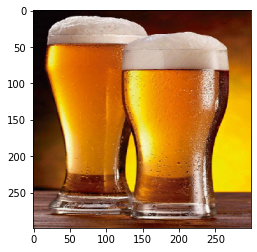

In [20]:
#la imagen mostrada el modelo la detectara como un limon, nuestra imagen que atacara
#al modelo
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [22]:
#guardamos nuestra imagen adversaria
from PIL import Image
im = Image.fromarray(adv[0].astype(np.uint8))
im.save("/content/drive/MyDrive/hacked.png")